In [9]:
import pandas as pd
import geopandas as gpd
import pybdshadow
#Read building data
buildings = gpd.read_file(r'data/bd_demo.json')
buildings

,id,height,x,y,geometry
0,0,42,139.698802,35.533816,"POLYGON ((139.69831 35.53380, 139.69831 35.533..."
1,1,9,139.698402,35.534030,"POLYGON ((139.69799 35.53417, 139.69799 35.533..."
2,2,45,139.698491,35.534637,"POLYGON ((139.69864 35.53445, 139.69863 35.534..."
3,3,9,139.698784,35.534735,"POLYGON ((139.69864 35.53477, 139.69866 35.534..."
4,4,90,139.700506,35.536064,"POLYGON ((139.70015 35.53590, 139.70039 35.535..."
...,...,...,...,...,...
1369,27826,5,139.708790,35.552112,"POLYGON ((139.70876 35.55223, 139.70869 35.552..."
1370,27827,43,139.706311,35.551746,"POLYGON ((139.70637 35.55183, 139.70621 35.551..."
1371,27828,16,139.705786,35.551667,"POLYGON ((139.70583 35.55179, 139.70572 35.551..."
1372,27829,14,139.708900,35.551267,"POLYGON ((139.70867 35.55133, 139.70867 35.551..."


In [10]:
#Preprocess building data before calculate shadow
#It will remove empty polygons and convert multipolygons into polygons.
buildings = pybdshadow.bd_preprocess(buildings)

In [11]:
#Given UTC time
date = pd.to_datetime('2015-01-01 02:45:33.959797119')
#Calculate shadows
shadows = pybdshadow.bdshadow_sunlight(buildings,date,epsg = 3857)

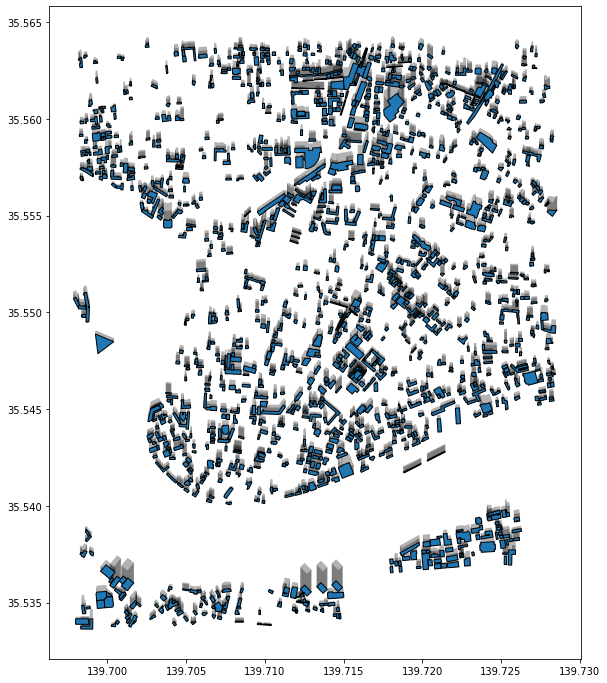

In [12]:
#Visualize using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(12,12))
ax = plt.subplot(111)

shadows.plot(ax = ax,facecolor = (0,0,0,0.3))
buildings.plot(ax = ax,edgecolor = 'k')

plt.show()

In [5]:
#Visualize using keplergl
pybdshadow.show_bdshadow(buildings = buildings,shadows = shadows)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '4eo0v3', 'type': '…